In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/409318/problem2.csv', sep = ';')
df.head()

user_id  revenue testgroup
0        1        0         b
1        2        0         a
2        3        0         a
3        4        0         b
4        5        0         b

In [4]:
  # Размер двух выборок
controle_group = df[df.testgroup == 'a']['revenue']
testgroup = df[df.testgroup == 'b']['revenue']

print('Размер тестовой группы {}'.format (testgroup.shape[0]))
print('Размер контрольной группы {}'.format (controle_group.shape[0]))
print('Тестовая группа больше на {}'.format (testgroup.shape[0] - controle_group.shape[0]))

Размер тестовой группы 202667
Размер контрольной группы 202103
Тестовая группа больше на 564


In [5]:
  # Выручка в тестовой и контрольной группе
controle_group_revenue = controle_group.sum()
testgroup_revenue = testgroup.sum()

print('Выручка в тестовой группе {}'.format (testgroup_revenue))
print('Выручка в контрольной группе {}'.format (controle_group_revenue))
print('Выручка в тестовой группе больше на {}'.format (testgroup_revenue - controle_group_revenue))

Выручка в тестовой группе 5421603
Выручка в контрольной группе 5136189
Выручка в тестовой группе больше на 285414


In [6]:
  # Количество покупателей в тестовой и контрольной группе
controle_group_ncustomers = df.query('testgroup == "a" and revenue != 0')['revenue'].count()
testgroup_ncustomers = df.query('testgroup == "b" and revenue != 0')['revenue'].count()

print('Количество покупателей в тестовой группе {}'.format(testgroup_ncustomers))
print('Количество покупателей в контрольной группе {}'.format(controle_group_ncustomers))
print('Количество покупателей в контрольной группе больше на {}'.format(controle_group_ncustomers - testgroup_ncustomers))

Количество покупателей в тестовой группе 1805
Количество покупателей в контрольной группе 1928
Количество покупателей в контрольной группе больше на 123


In [7]:
  # Количество посетителей в тестовой и контрольной группе
controle_group_nclients = controle_group.count()
testgroup_nclients = testgroup.count()

print('Количество посетителей в тестовой группе {}'.format (testgroup_nclients))
print('Количество посетителей в контрольной группе {}'.format (controle_group_nclients))
print('Количество посетителей в тестовой группе больше на {}'.format (testgroup_nclients -controle_group_nclients))

Количество посетителей в тестовой группе 202667
Количество посетителей в контрольной группе 202103
Количество посетителей в тестовой группе больше на 564


In [8]:
  # Показатель ARPU в тестовой и контрольной группе
ARPU_controle_group = round(controle_group_revenue / controle_group_nclients, 2)
ARPU_testgroup = round(testgroup_revenue / testgroup_nclients, 2)

print('Показатель ARPU в тестовой группе {}'.format (ARPU_testgroup))
print('Показатель ARPU в контрольной группе {}'.format (ARPU_controle_group))
print('Показатель ARPU в тестовой группе больше на {}'.format (round(ARPU_testgroup - ARPU_controle_group, 2)))

Показатель ARPU в тестовой группе 26.75
Показатель ARPU в контрольной группе 25.41
Показатель ARPU в тестовой группе больше на 1.34


In [9]:
  # Показатель ARPPU в тестовой и контрольной группе
ARPPU_controle_group = round(controle_group_revenue / controle_group_ncustomers, 2)
ARPPU_testgroup = round(testgroup_revenue / testgroup_ncustomers, 2)

print('Показатель ARPPU в тестовой группе {}'.format (ARPPU_testgroup))
print('Показатель ARPPU в контрольной группе {}'.format (ARPPU_controle_group))
print('Показатель ARPPU в тестовой группе больше на {}'.format (round(ARPPU_testgroup - ARPPU_controle_group)))

Показатель ARPPU в тестовой группе 3003.66
Показатель ARPPU в контрольной группе 2664.0
Показатель ARPPU в тестовой группе больше на 340.0


Показатель ARPU (среднее значение выручки относительно всех посетиелей) в тестовой и контрольной группе отличается не значительно

В то время как показатель ARPPU (среднее значение выруки относительно только покупателей) в тестовой значительно выше этого показателя в контрольной группе

Обе метрики могут быть интересны бизнесу. Сравнение ARPU позволит выяснить имеется ли статистически значимое изменение в среднем доходе с одного активного пользователя в тестовой группе по сравнению с тем же показателем в контрольной группе. 

В то время как сравнение показателей ARPPU позволит понять стали ли покупатели в тестовой группе тратить больше денег по сравнению с покупателями в контрольной группе.

Посмотрим на распределение платежей в обеих группах

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


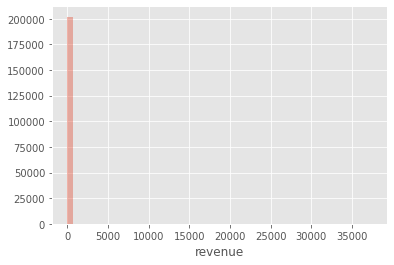

In [12]:
  # Распределение платежей в контрольной группе
  # Ассиметричное, смещено влево
sns.distplot(controle_group, kde=False)

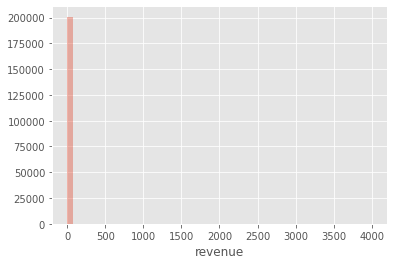

In [13]:
  # Распределение платежей в тестовой группе
  # Также ассиметричное и смещено влево
  # Теперь оставим значения больше 0 и посмотрим на распределения снова
sns.distplot(testgroup, kde=False)

In [14]:
  # Показатели платежей только для покупателей (значения платежей  больше 0)
controle_group_customers = df.query('testgroup == "a" and revenue != 0')['revenue']
testgroup_customers = df.query('testgroup == "b" and revenue != 0')['revenue']

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


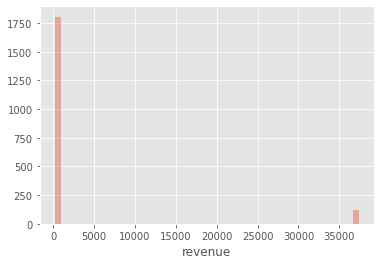

In [15]:
  # Распределение платежей в контрольной группе осталось ассиметричным, смещенным вправо
  # В данной группе есть заметные выбросы справа
sns.distplot(controle_group_customers, kde=False)

In [16]:
  # Большинство значений платежей в контрольной группе сконцентрировано в левой части графика в диапозоне от 200 до 361 (75%)
  # В тоже время есть заметные выбросы в правой части графика
controle_group_customers.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

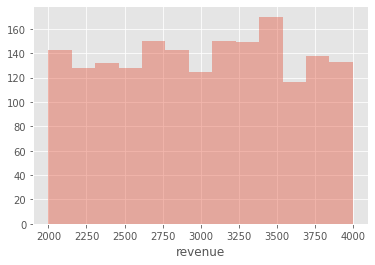

In [17]:
  # Распределение платежей в тестовой группе распределено равномернее 
  # Заметные выбросы отсутствуют 
sns.distplot(testgroup_customers, kde=False)

In [18]:
  # Все значения в тестовой группе напротив сконцентрированы в правой части графика в диапозоне от 2000 до 4000
  # Выбросы отсутствуют
testgroup_customers.describe()

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

Таким образом

Распределение в обеих группах отличается от нормального 

В контрольной группе присутствуют явные выбросы

В связи с этим для проверки равенства показателей ARPU и ARPPU в двух группах следует воспользоваться Bootstrap 

Bootstrap не требует нормальности распределения, что позволит сравнить группы между собой 

## Bootstrap

In [19]:
  # Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1,  # числовые значения первой выборки
    data_column_2,  # числовые значения второй выборки
    boot_it = 1000,  # количество бутстрэп-подвыборок
    statistic = np.mean,  # интересующая нас статистика
    bootstrap_conf_level = 0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): 
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True 
        ).values 
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2))
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
    mean = np.mean(pd_boot_data)
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    ) 
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins=50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0, ymax=50, linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"ci": ci, "p_value": p_value, 'mean': mean}

Сначала сравним показатели ARPU (среднее значение выручки относительно всех посетителей) в тестовой и контрольной группе

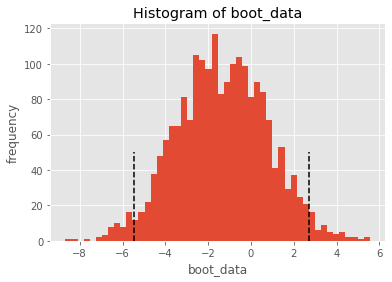

{'ci':               0
 0.025 -5.450451
 0.975  2.730528,
 'p_value': 0.5260143878251742,
 'mean': 0   -1.341139
 dtype: float64}

In [20]:
  # С помощью bootstrap проверим значимость отличий между ARPU в контрольной и тестовой группе
  # Нулевая гипотеза = отличий нет
  # Альтернативная гипотеза = отличия есть

get_bootstrap(controle_group, testgroup, boot_it=2000, statistic=np.mean)

p_value значительно больше 0.05, следовательно результаты Bootstrap показывают отсутствие статистически значимых отличий между ARPU (среднем значением выручки) в контрольной и тестовой группе

Принимаем нулевую гипотезу о равенстве ARPU в двух группах

Теперь сравним показатели ARPPU (среднее значение выручки относительно только покупателей) в тестовой и контррльной группе

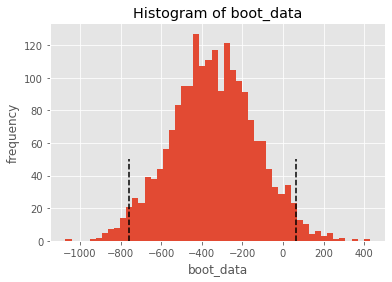

{'ci':                 0
 0.025 -756.314380
 0.975   65.045215,
 'p_value': 0.1008711608563625,
 'mean': 0   -342.113058
 dtype: float64}

In [21]:
  # С помощью bootstrap проверим значимость отличий между ARPPU в контрольной и тестовой группе
  # Нулевая гипотеза = отличий нет
  # Альтернативная гипотеза = отличия есть
    
get_bootstrap(controle_group_customers, testgroup_customers, boot_it=2000, statistic=np.mean)

p_value также оказался больше 0.05, следовательно результаты Bootstrap показывают отсутствие статистически значимых отличий между ARPPU (среднем значением выручки относительно только покупателей) в контрольной и тестовой группе

Принимаем нулевую гипотезу о равенстве ARPPU в двух группах

## Вывод


Несмотря на видимые отличия ARPU (26.75 и 25.41) и ARPPU (3003 и 2664) в тестовой и контрольной группе 

Результаты Bootstrap подтвердили отсутствие статистически значимых отличий показателей ARPU и ARPPU в тестовой и контрольной группе (p_value > 0.05)

Таким образом, наборы акционных предложений тестовой группы не приведут к гарантированному увеличению показателей ARPU и ARPPU и вероятнее всего отличия между показателями в двух группах были случайны

Поэтому следует оставить наборы акционных предложений контрольной группы